# _Héctor J. Aparicio Muñoz_

# Caso de estudio: ML con PLN para Análisis de Sentimientos de opiniones

Usaremos la librería **_scikit learn_** con el fin de crear y evaluar varios clasificadores que nos permitan determinar el sentimiento del texto: positivo o negativo.

El dataset con el que vamos a trabajar se puede descargar desde la siguiente URL: 
https://www.kaggle.com/nehasontakke/amazon-unlocked-mobilecsv

## --> Carga del conjunto de datos
Vamos a trabajar con el dataset *Amazon_Unlocked_Mobile.csv*, liberado por [PromptCloud](https://www.promptcloud.com/) y  que contiene información sobre opiniones, calificaciones y precios de cerca de 400.000 teléfonos móviles libres vendidos en Amazon.com

NOTA: Para agilizar los cálculos vamos a seleccionar una muestra de los datos.

In [1]:
import pandas as pd
import numpy as np

# Lectura de datos:
file_path = './Amazon_Unlocked_Mobile.csv'

df = pd.read_csv(file_path) 

# Selección de la muestra:
df = df.sample(frac=0.1, random_state=10)
df.dropna(inplace=True)  # Eliminamos filas con elementos nulos.

In [2]:
# Veamos la muestra con la que nos hemos quedado del dataser anterior:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0
...,...,...,...,...,...,...
30001,Apple iPhone 5c 32GB (Blue) - AT&T,Apple,274.95,5,What an upgrade compared to the iPhone 4. Goin...,7.0
313198,Samsung Galaxy Grand Prime DUOS G531H/DS - Gra...,Samsung,179.99,4,I liked it at first but is starting to lag alr...,0.0
138219,"BLU Studio 5.0 C HD Unlocked Cellphone, White",BLU,2000.00,4,very nice,0.0
66571,Apple iPhone 6s 64 GB International Warranty U...,Apple,689.95,1,It is not a new one. The tagboard on the box w...,0.0


## --> Etiquetamos el dataset

Vamos a crear la variable Sentimiento. Para ello, eliminamos los registros de sentimiento neutral que se corresponden a los registros de Rating = 3. Después, consideraremos sentimiento positivo (sentiment = 1) a los registros con rating > 3. El resto de registros tendrán un sentimiento negativo (sentiment = 0).

In [3]:
# Veamos primeramente las dimensiones iniciales de la muestra del dataset con la que vamos a trabajar:
df.shape

(33408, 6)

In [4]:
# Vamos a crear la variable "Sentiment" en nuestro dataset:

In [5]:
# Comenzamos creando una nueva columna, de momento vacía:
df = df.reindex(columns=list(df.columns) + ['Sentiment'])

In [6]:
# Eliminamos los registros con sentimiento neutral (Rating = 3):
df = df[df['Rating'] != 3]

In [7]:
# Vamos a asignarle los valores adecuados a la nueva variable:
for i in range(len(df)):
    if df.iloc[i, df.columns.get_loc('Rating')] > 3:
        df.iloc[i, df.columns.get_loc('Sentiment')] = 1
    else:
        df.iloc[i, df.columns.get_loc('Sentiment')] = 0

In [8]:
# El dataset queda de la siguiente forma:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1.0
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1.0
...,...,...,...,...,...,...,...
30001,Apple iPhone 5c 32GB (Blue) - AT&T,Apple,274.95,5,What an upgrade compared to the iPhone 4. Goin...,7.0,1.0
313198,Samsung Galaxy Grand Prime DUOS G531H/DS - Gra...,Samsung,179.99,4,I liked it at first but is starting to lag alr...,0.0,1.0
138219,"BLU Studio 5.0 C HD Unlocked Cellphone, White",BLU,2000.00,4,very nice,0.0,1.0
66571,Apple iPhone 6s 64 GB International Warranty U...,Apple,689.95,1,It is not a new one. The tagboard on the box w...,0.0,0.0


In [9]:
# Por lo tanto, después de crear la nueva variable, las dimensiones del dataset son:
df.shape

(30737, 7)

## --> Creación de dataset de entrenamiento y test

Vamos a separar el dataset en dos partes (entrenamiento y test) con la proporción 70-30.

In [10]:
# Comenzamos importando la función:
from sklearn.model_selection import train_test_split

In [11]:
# Vamos a crear dos estructuras de la misma longitud, el bloque de características y la variable objetivo, que 
# serán las que posteriormente le pasaremos a la función "train_test_split":
y = df.pop("Sentiment")
X = df

In [12]:
# Pasamos a la función "train_test_split" el bloque de características y la variable objetivo, para que genere 
# bloques de entrenamiento y test para ambas estructuras, con la proporción 70-30:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# Las dimensiones de los bloques generados son:
print("Dataset de entrenamiento, bloque de características:\n\t", X_train.shape)
print("Dataset de entrenamiento, variable objetivo:\n\t", y_train.shape)

print("Dataset de test, bloque de características:\n\t", X_test.shape)
print("Dataset de test, variable objetivo:\n\t", y_test.shape)

Dataset de entrenamiento, bloque de características:
	 (21515, 6)
Dataset de entrenamiento, variable objetivo:
	 (21515,)
Dataset de test, bloque de características:
	 (9222, 6)
Dataset de test, variable objetivo:
	 (9222,)


## --> Entrenamiento del dataset: Preparación de los datos de texto

A continuación utilizaremos el método de bolsas de palabras para transformar los documentos en una "document term matrix".

In [14]:
# A partir de nuestra colección de documentos de texto, que van a ser las "reviews" de cada registro del 
# dataset, vamos a aprender su vocabulario y crear la "document term matrix".

In [15]:
# Comenzaremos generando el corpus de documentos con el que vamos a trabajar, que ya hemos dicho que son las 
# "reviews" de cada registro del dataset:

# Creamos una lista llamada "corpus_train" en la que almacenamos como tipo "strings" los "reviews" de cada 
# registro del dataset de entrenamiento:
corpus_train = []
for i in range(len(X_train)):
    corpus_train.append(X_train.iloc[i, X_train.columns.get_loc('Reviews')])

# Veamos su contenido:
#    corpus_train

In [16]:
# Vamos a importar la clase:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Creamos una instancia de la clase anterior:
vectorizer = CountVectorizer()

# NOTA: Podemos ajustar los parámetros de la entidad CountVectorizer de la manera que nos interese. Por ejemplo, 
# si quisiéramos una frecuencia mínima de documentos de 5 (ignorar términos que aparecen en menos de 5 
# documentos), y extraer unigramas y bigramas, lo especificaríamos al crear la instancia de la clase 
# "CountVectorizer" de la siguiente manera:
#    vectorizer_ajustada = CountVectorizer(min_df = 5, ngram_range=(1, 2))

In [18]:
# Llamamos a la función "fit()" para aprender el vocabulario de las "Reviews" del dataset de entrenamiento:
vectorizer.fit(corpus_train)

# Podemos ver el vocabulario aprendido:
#    print("Vocabulario: ", vectorizer.vocabulary_)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [19]:
# NOTA: En algunos casos antes de usar la función "fit()" para aprender el vocabulario anterior, puede ser 
# conveniente realizar alguna etapa de preprocesado de los datos para eliminar términos o secuencias de palabras 
# que carezcan de significado.

In [20]:
# Llamamos a la función "transform()" para codificar cada documento (review) del dataset de entrenamiento como 
# un vector, y obtener así la matriz dispersa de términos del documento que buscábamos:
train_data = vectorizer.transform(corpus_train)

In [21]:
# NOTA: Se podrían haber dado los dos pasos anteriores, "fit()" y "transform()", a la vez mediante:
#         train_data = vectorizer.fit_transform(corpus_train)

In [22]:
# Vamos a crear también la "document term matrix" del dataset de test, para tenerla lista para posteriormente 
# evaluar los clasificadores que creemos.

# Comenzamos creando una lista llamada "corpus_test" en la que almacenamos como tipo "strings" los "reviews" 
# de cada registro del dataset de test:
corpus_test = []
for i in range(len(X_test)):
    corpus_test.append(X_test.iloc[i, X_test.columns.get_loc('Reviews')])

# Llamamos a la función "transform()" para codificar cada documento (review) del dataset de test como un vector
# a partir del vocabulario aprendido del dataset de entrenamiento, y obtener así la "document term matrix" 
# del dataset de test:
test_data = vectorizer.transform(corpus_test)

## --> Opción alternativa: Entidad _TfidfVectorizer_

Podemos utilizar como alternativa a la entidad *CountVectorizer* la entidad *TfidfVectorizer* (este método resalta las palabras que son más frecuentes en un documento pero no en todos los documentos). 

Veamos cómo se haría especificando por ejemplo una frecuencia mínima de documentos de 5 y extrayendo también unigramas y bigramas.

In [23]:
# Tenemos previamente generados los corpus de documentos "corpus_train", con el que entrenar la entidad 
# "TfidfVectorizer", y "corpus_test", con el que posteriormente evaluaremos el clasificador.

# Comenzamos importando la clase:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos una instancia de la clase "TfidfVectorizer", especificando una frecuencia mínima de documentos de 5 
# (ignorar términos que aparecen en menos de 5 documentos), y extrayendo unigramas y bigramas:
vectorizer_tfidf = TfidfVectorizer(min_df = 5, ngram_range=(1, 2))

# Llamamos a la función "fit()" para aprender el vocabulario de las "Reviews" del dataset de entrenamiento, 
# y a la función "transform()" para codificar cada documento (review) del dataset de entrenamiento como 
# un vector, y obtener así la matriz dispersa de términos del documento:
train_data_tfidf = vectorizer_tfidf.fit_transform(corpus_train)

# Llamamos a la función "transform()" para codificar cada documento (review) del dataset de test como un vector
# a partir del vocabulario aprendido del dataset de entrenamiento, y obtener así la "document term matrix" 
# del dataset de test:
test_data_tfidf = vectorizer_tfidf.transform(corpus_test)

# DESARROLLO DE MODELOS DE PREDICCIÓN DE LA EMOCIÓN

Vamos a implementar, entrenar y evaluar tres modelos distintos, para poder compararlos. Serán un modelo Naive Bayes, un modelo de Regresión logística y un modelo de Máquinas de Vectores de Soporte (SVM).

NOTA: Lo haremos a partir de la matriz de términos del documento obtenida con la entidad _CountVectorizer_, aunque también podríamos haber decidido hacerlo a partir de la obtenida con la entidad _TfidfVectorizer_.

## --> Modelo Naive Bayes

Vamos a declarar y entrenar el modelo de Naive Bayes con el conjunto de datos de entrenamiento. Para posteriormente evaluar el clasificador predeciremos las etiquetas para el conjunto de datos test.

In [24]:
# Importamos la clase:
from sklearn.naive_bayes import MultinomialNB

# Creamos una instancia de la clase anterior:
clfrNB = MultinomialNB()

# Invocamos al método "fit()" con el conjunto de entrenamiento para entrenar al clasificador:
clfrNB.fit(train_data, y_train)

# Predicción de las etiquetas o variables objetivo de nuestro conjunto de test:
predicted_labels_NB = clfrNB.predict(test_data)

# Veamos el resultado de los 20 primeros valores de la predicción sobre el conjunto de test, junto con los 20 
# primeros valores reales de las clases de dicho conjunto de test:
print("Predicción modelo Naive Bayes:\t", predicted_labels_NB[0:20])
print("Valores reales de las clases:\t", y_test.values[0:20])

Predicción modelo Naive Bayes:	 [1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
Valores reales de las clases:	 [1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]


## --> Modelo Regresión logística

Vamos a declarar y entrenar el modelo de Regresicón logística con el conjunto de datos de entrenamiento. Para posteriormente evaluar el clasificador predeciremos las etiquetas para el conjunto de datos de test.

In [25]:
# Importamos la clase:
from sklearn.linear_model import LogisticRegression

# Creamos una instancia de la clase anterior:
clfrLogReg = LogisticRegression()

# Invocamos al método "fit()" con el conjunto de entrenamiento para entrenar al clasificador:
clfrLogReg.fit(train_data, y_train)

# Predicción de las etiquetas o variables objetivo de nuestro conjunto de test:
predicted_labels_LogReg = clfrLogReg.predict(test_data)

# Veamos el resultado de los 20 primeros valores de la predicción sobre el conjunto de test, junto con los 20 
# primeros valores reales de las clases de dicho conjunto de test:
print("Predicción modelo Reg.log.:\t", predicted_labels_LogReg[0:20])
print("Valores reales de las clases:\t", y_test.values[0:20])

Predicción modelo Reg.log.:	 [1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
Valores reales de las clases:	 [1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]


## --> Modelo de Máquina de Vectores Soporte (SVM)

Vamos a declarar y entrenar el modelo SVM con el conjunto de datos de entrenamiento. Para posteriormente evaluar el clasificador predeciremos las etiquetas para el conjunto de datos de test.

In [26]:
# Importamos la clase:
from sklearn import svm

# Creamos una instancia de la clase anterior:
clfrSVM = svm.SVC(kernel='linear', C=0.1)

# Invocamos al método "fit()" con el conjunto de entrenamiento para entrenar al clasificador:
clfrSVM.fit(train_data, y_train)

# Predicción de las etiquetas o variables objetivo de nuestro conjunto de test:
predicted_labels_SVM = clfrSVM.predict(test_data)

# Veamos el resultado de los 20 primeros valores de la predicción sobre el conjunto de test, junto con los 20 
# primeros valores reales de las clases de dicho conjunto de test:
print("Predicción del modelo SVM:\t", predicted_labels_SVM[0:20])
print("Valores reales de las clases:\t", y_test.values[0:20])

Predicción del modelo SVM:	 [1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
Valores reales de las clases:	 [1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]


# EVALUACIÓN DE LOS MODELOS QUE ACABAMOS DE ENTRENAR

Vamos a calcular diferentes métricas para cada uno de los clasificadores que acabamos de entrenar, para poder compararlos y posteriormente decidir cuál es el que mejores resultados nos permite obtener.

## --> Matriz de confusión de los modelos de clasificación

Vamos a calcular la matriz de confusión de los modelos de Naive Bayes, Regresión logística y SVM que acabamos de entrenar.

In [27]:
from sklearn.metrics import confusion_matrix

# Vamos a enfrentar las etiquetas predichas para nuestro conjunto de test (predicted_labels_NB para el modelo 
# Naive Bayes, predicted_labels_LogReg para el modelo Regresión logística y predicted_labels_SVM para el 
# modelo SVM) con los valores reales (y_test).

# NOTA: Como sabemos, se trata de un problema de clasificación binario, en el que vamos a suponer que la clase 
# positiva es la 1 y la negativa la 0.

# NOTA: En todos los casos, a la matriz obtenida al aplicar la función confusion_matrix, le aplicamos la función 
# flip() de Numpy para revertir el orden de sus elementos y obtener así la matriz de confusión con el orden que 
# buscamos: 
#    [[tp fn]
#     [fp tn]]
# Es decir, que sea una matriz con el valor de las observaciones reales en las filas, y en las columnas las 
# predicciones del modelo.

# Modelo Naive Bayes:
matriz_conf_NB = np.flip(confusion_matrix(y_test, predicted_labels_NB))
print('Matriz de confusión Naive bayes:\n', matriz_conf_NB)
# Si desglosamos la matriz anterior en los términos que la componen:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels_NB).ravel()
print('Verdaderos positivos: ', tp)
print('Falsos positivos: ', fp)
print('Verdaderos negativos: ', tn)
print('Falsos negativos: ', fn)

# Modelo Regresión logística:
matriz_conf_LogReg = np.flip(confusion_matrix(y_test, predicted_labels_LogReg))
print('\nMatriz de confusión Regresión logística:\n', matriz_conf_LogReg)
# Si desglosamos la matriz anterior en los términos que la componen:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels_LogReg).ravel()
print('Verdaderos positivos: ', tp)
print('Falsos positivos: ', fp)
print('Verdaderos negativos: ', tn)
print('Falsos negativos: ', fn)

# Modelo SVM:
matriz_conf_SVM = np.flip(confusion_matrix(y_test, predicted_labels_SVM))
print('\nMatriz de confusión SVM:\n', matriz_conf_SVM)
# Si desglosamos la matriz anterior en los términos que la componen:
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels_SVM).ravel()
print('Verdaderos positivos: ', tp)
print('Falsos positivos: ', fp)
print('Verdaderos negativos: ', tn)
print('Falsos negativos: ', fn)

Matriz de confusión Naive bayes:
 [[6609  232]
 [ 547 1834]]
Verdaderos positivos:  6609
Falsos positivos:  547
Verdaderos negativos:  1834
Falsos negativos:  232

Matriz de confusión Regresión logística:
 [[6619  222]
 [ 435 1946]]
Verdaderos positivos:  6619
Falsos positivos:  435
Verdaderos negativos:  1946
Falsos negativos:  222

Matriz de confusión SVM:
 [[6621  220]
 [ 463 1918]]
Verdaderos positivos:  6621
Falsos positivos:  463
Verdaderos negativos:  1918
Falsos negativos:  220


## --> Tasa de acierto de los modelos de clasificación

Calculamos la tasa de acierto de los modelos de Naive Bayes, Regresión logística y SVM que hemos entrenado.

In [28]:
from sklearn.metrics import accuracy_score

# Vamos a enfrentar las etiquetas predichas para nuestro conjunto de test (predicted_labels_NB para el modelo 
# Naive Bayes, predicted_labels_LogReg para el modelo Regresión logística y predicted_labels_SVM para el 
# modelo SVM) con los valores reales (y_test).

# Modelo Naive Bayes:
tasa_acierto_NB = accuracy_score(y_test, predicted_labels_NB)
print('Tasa de acierto Naive bayes: ', tasa_acierto_NB)

# Modelo Regresión logística:
tasa_acierto_LogReg = accuracy_score(y_test, predicted_labels_LogReg)
print('Tasa de acierto Regresión Logística: ', tasa_acierto_LogReg)

# Modelo SVM:
tasa_acierto_SVM = accuracy_score(y_test, predicted_labels_SVM)
print('Tasa de acierto SVM: ', tasa_acierto_SVM)

Tasa de acierto Naive bayes:  0.9155280850140968
Tasa de acierto Regresión Logística:  0.9287573194534808
Tasa de acierto SVM:  0.9259379744090219


## --> Métricas precision, recall y F1-score de los modelos

Calculamos ahora las métricas precision, recall y F1-score de los modelos de Naive Bayes, Regresión logística y SVM con los que venimos trabajando.

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Vamos a enfrentar las etiquetas predichas para nuestro conjunto de test (predicted_labels_NB para el modelo 
# Naive Bayes, predicted_labels_LogReg para el modelo Regresión logística y predicted_labels_SVM para el 
# modelo SVM) con los valores reales (y_test).

# NOTA: Como sabemos, se trata de un problema de clasificación binario, en el que vamos a suponer que la clase 
# positiva es la 1 y la negativa la 0. En el caso de que sólo nos interesaran las métricas anteriores para la 
# clase positiva, deberíamos añadir como argumentos a las funciones anteriores lo siguiente:
#                labels = [0, 1], pos_label = 1  # Aunque ya es la opción por defecto si no lo añadimos.
# Si sólo nos interesan para la clase negativa añadimos:
#                labels = [0, 1], pos_label = 0
# En nuestro caso nos va a interesar calcularlas para las dos clases, por lo tanto añadimos el argumento:
#                average = None
# En el caso de la métrica F1-score, vamos a calcular además la media denominada "micro", añadiendo el argumento:
#                average = 'micro'
# que se considera la media global y que quiere decir que utilizamos para calcularla la suma de los verdaderos 
# positivos, la suma de los falsos negativos y la suma de los falsos positivos. Como consecuencia, el valor 
# resultante es el mismo que para la tasa de acierto, y para la precisión y recall micros:
#                micro-F1 = accuracy = micro-precision = micro-recall

# Modelo Naive Bayes:
precision_NB = precision_score(y_test, predicted_labels_NB, average = None)
recall_NB = recall_score(y_test, predicted_labels_NB, average = None)
medida_f1_NB = f1_score(y_test, predicted_labels_NB, average = None)
medida_f1_micro_NB = f1_score(y_test, predicted_labels_NB, average='micro')

print('\tPrecisión Naive Bayes; ', precision_NB)
print('\tRecall Naive Bayes: ', recall_NB)
print('\tF1 score Naive Bayes: ', medida_f1_NB)
print('\tF1 score micro Naive Bayes: ', medida_f1_micro_NB)

# Modelo Regresión logística:
precision_LogReg = precision_score(y_test, predicted_labels_LogReg, average = None)
recall_LogReg = recall_score(y_test, predicted_labels_LogReg, average = None)
medida_f1_LogReg = f1_score(y_test, predicted_labels_LogReg, average = None)
medida_f1_micro_LogReg = f1_score(y_test, predicted_labels_LogReg, average='micro')

print('\n\tPrecisión Regresión Logística: ', precision_LogReg)
print('\tRecall Regresión Logística: ', recall_LogReg)
print('\tF1 score Regresión Logística: ', medida_f1_LogReg)
print('\tF1 score micro Regresión Logística: ', medida_f1_micro_LogReg)

# Modelo SVM:
precision_SVM = precision_score(y_test, predicted_labels_SVM, average = None)
recall_SVM = recall_score(y_test, predicted_labels_SVM, average = None)
medida_f1_SVM = f1_score(y_test, predicted_labels_SVM, average = None)
medida_f1_micro_SVM = f1_score(y_test, predicted_labels_SVM, average='micro')

print('\n\tPrecisión SVM: ', precision_SVM)
print('\tRecall SVM: ', recall_SVM)
print('\tF1 score SVM: ', medida_f1_SVM)
print('\tF1 score micro SVM: ', medida_f1_micro_SVM)

	Precisión Naive Bayes;  [0.88770571 0.92356065]
	Recall Naive Bayes:  [0.77026459 0.96608683]
	F1 score Naive Bayes:  [0.82482573 0.94434522]
	F1 score micro Naive Bayes:  0.9155280850140968

	Precisión Regresión Logística:  [0.89760148 0.93833286]
	Recall Regresión Logística:  [0.81730365 0.9675486 ]
	F1 score Regresión Logística:  [0.85557265 0.9527168 ]
	F1 score micro Regresión Logística:  0.9287573194534808

	Precisión SVM:  [0.89710009 0.93464145]
	Recall SVM:  [0.80554389 0.96784096]
	F1 score SVM:  [0.84886037 0.95095153]
	F1 score micro SVM:  0.9259379744090219


## --> Selección del modelo más óptimo

Atendiendo a las métricas obtenidas para cada uno de los modelos, vamos a indicar cuál es el modelo que convendría utilizar para predecir el sentimiento de las opiniones en un sistema en producción.

In [30]:
from sklearn.metrics import classification_report

# Veamos el resumen de todas las métricas anteriores. Podemos hacerlo mirando las métricas que ya hemos sacado en 
# los puntos anteriores, o para que sea más cómodo, mirando el resumen en el que obtenemos todas las métricas 
# juntas mediante la función classification_report:

# NOTA: La clase 0 la renombraré como "Sentimiento negativo", y la clase 1 como "Sentimiento positivo".

print('--> Resumen de las métricas de evaluación del modelo de Naive Bayes:')
print(classification_report(y_test, predicted_labels_NB, 
                            target_names = ['Sentimiento negativo', 'Sentimiento positivo'], digits = 4))

print('--> Resumen de las métricas de evaluación del modelo de Regresión logística:')
print(classification_report(y_test, predicted_labels_LogReg, 
                            target_names = ['Sentimiento negativo', 'Sentimiento positivo'], digits = 4))

print('--> Resumen de las métricas de evaluación del modelo SVM:')
print(classification_report(y_test, predicted_labels_SVM, 
                            target_names = ['Sentimiento negativo', 'Sentimiento positivo'], digits = 4))

--> Resumen de las métricas de evaluación del modelo de Naive Bayes:
                      precision    recall  f1-score   support

Sentimiento negativo     0.8877    0.7703    0.8248      2381
Sentimiento positivo     0.9236    0.9661    0.9443      6841

            accuracy                         0.9155      9222
           macro avg     0.9056    0.8682    0.8846      9222
        weighted avg     0.9143    0.9155    0.9135      9222

--> Resumen de las métricas de evaluación del modelo de Regresión logística:
                      precision    recall  f1-score   support

Sentimiento negativo     0.8976    0.8173    0.8556      2381
Sentimiento positivo     0.9383    0.9675    0.9527      6841

            accuracy                         0.9288      9222
           macro avg     0.9180    0.8924    0.9041      9222
        weighted avg     0.9278    0.9288    0.9276      9222

--> Resumen de las métricas de evaluación del modelo SVM:
                      precision    recall  f1-

In [31]:
# NOTA: Los valores son muy similares en todos los casos que se han entrenado los modelos, pero puede haber 
# diferencias mínimas cada vez que se vuelvan a entrenar debido a la aleatoriedad en la elección de los conjuntos 
# de datos de entrenamiento y de test.

print('''>> El modelo seleccionado es el de Regresión logística, ya que es el que mejores valores tiene.
- Si nos fijamos en la precisión (que nos da la proporción de los clasificados de una clase que son realmente de 
esa clase), el recall (que nos da proporción de los clasificados correctamente de una clase sobre el total de los 
de esa clase), y el F1-score (que nos da la media armónica de precisión y recall), tenemos que:
-- para la clase Sentimiento positivo, los valores de recall son muy similares en los tres modelos, siendo un 
pelín inferior el valor de precisión en el modelo Naive Bayes, lo que además lastra un poco su F1-score.
-- para la clase Sentimiento negativo, los valores de precisión y recall son inferiores en el modelo Naive Bayes 
que en los otros dos. Comparando el de Regresión logística con el SVM, tenemos que tienen una precisión muy 
similar, pero un recall mayor el de Regresión logística, con lo cual su métrica combinada F1-score es superior 
a la del modelo SVM.
- Por otro lado, también podemos ver que la tasa de acierto global es mayor para el modelo de Regresión logística 
que para los otros dos.

Como resumen podemos decir que, a la vista de los resultados obtenidos, el modelo de Regresión logística tiene 
una tasa de acierto global un pelín superior a los otros dos, su proporción de aciertos dentro de los clasificados 
como Sentimiento positivo es un poco superior a la del modelo de Naive Bayes, y su proporción de clasificados como 
Sentimiento negativo dentro de los que realmente lo son es superior tanto al modelo Naive Bayes como al SVM.''')

>> El modelo seleccionado es el de Regresión logística, ya que es el que mejores valores tiene.
- Si nos fijamos en la precisión (que nos da la proporción de los clasificados de una clase que son realmente de 
esa clase), el recall (que nos da proporción de los clasificados correctamente de una clase sobre el total de los 
de esa clase), y el F1-score (que nos da la media armónica de precisión y recall), tenemos que:
-- para la clase Sentimiento positivo, los valores de recall son muy similares en los tres modelos, siendo un 
pelín inferior el valor de precisión en el modelo Naive Bayes, lo que además lastra un poco su F1-score.
-- para la clase Sentimiento negativo, los valores de precisión y recall son inferiores en el modelo Naive Bayes 
que en los otros dos. Comparando el de Regresión logística con el SVM, tenemos que tienen una precisión muy 
similar, pero un recall mayor el de Regresión logística, con lo cual su métrica combinada F1-score es superior 
a la del modelo SVM.
- Por o

fpr Naive Bayes: [0.         0.22973541 1.        ]
tpr Naive Bayes: [0.         0.96608683 1.        ]
thresholds Naive Bayes: [2. 1. 0.]
AUC Naive Bayes: 0.8681757120595053

fpr Regresión logística: [0.         0.18269635 1.        ]
tpr Regresión logística: [0.        0.9675486 1.       ]
thresholds Regresión logística: [2. 1. 0.]
AUC Regresión logística: 0.8924261289660921

fpr SVM: [0.         0.19445611 1.        ]
tpr SVM: [0.         0.96784096 1.        ]
thresholds SVM: [2. 1. 0.]
AUC SVM: 0.8866924240231757


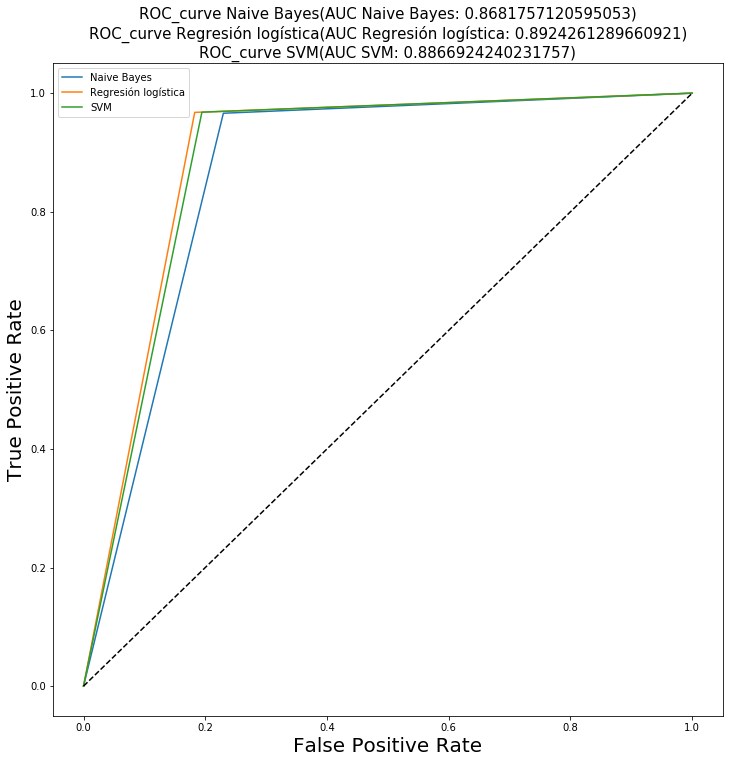

In [32]:
# Vamos a calcular a mayores las curvas ROC de los modelos anteriores, ya que también son una herramienta muy 
# potente para la selección del mejor modelo.

# import numpy as np  # Ya la tenemos importada de antes.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Calculamos los valores de las curvas ROC de cada modelo, así como el área bajo dechas curvas (AUC):

# Modelo Naive Bayes:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, predicted_labels_NB)
print('fpr Naive Bayes: ' + str(fpr_NB))
print('tpr Naive Bayes: ' + str(tpr_NB))
print('thresholds Naive Bayes: ' + str(thresholds_NB))
AUC_NB = auc(fpr_NB, tpr_NB)
print('AUC Naive Bayes: ' + str(AUC_NB))

# Modelo Regresión logística:
fpr_LogReg, tpr_LogReg, thresholds_LogReg = roc_curve(y_test, predicted_labels_LogReg)
print('\nfpr Regresión logística: ' + str(fpr_LogReg))
print('tpr Regresión logística: ' + str(tpr_LogReg))
print('thresholds Regresión logística: ' + str(thresholds_LogReg))
AUC_LogReg = auc(fpr_LogReg, tpr_LogReg)
print('AUC Regresión logística: ' + str(AUC_LogReg))

# Modelo SVM:
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, predicted_labels_SVM)
print('\nfpr SVM: ' + str(fpr_SVM))
print('tpr SVM: ' + str(tpr_SVM))
print('thresholds SVM: ' + str(thresholds_SVM))
AUC_SVM = auc(fpr_SVM, tpr_SVM)
print('AUC SVM: ' + str(AUC_SVM))

# Representamos las gráficas:
fig, ax = plt.subplots(figsize = (12, 12))
plt.plot(fpr_NB, tpr_NB, label = "Naive Bayes")
plt.plot(fpr_LogReg, tpr_LogReg, label = "Regresión logística")
plt.plot(fpr_SVM, tpr_SVM, label = "SVM")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title('ROC_curve Naive Bayes' + '(AUC Naive Bayes: ' + str(AUC_NB) + ')' + '\n' 
          + 'ROC_curve Regresión logística' + '(AUC Regresión logística: ' + str(AUC_LogReg) + ')' + '\n' 
          + 'ROC_curve SVM' + '(AUC SVM: ' + str(AUC_SVM) + ')', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [33]:
print('''Como podemos observar a partir de las curvas ROC anteriores y del área bajo las mismas (AUC), el modelo 
de Regresión logística sería en general el más preciso para nuestro caso de estudio de Análisis de Sentimientos 
de opiniones.''')

Como podemos observar a partir de las curvas ROC anteriores y del área bajo las mismas (AUC), el modelo 
de Regresión logística sería en general el más preciso para nuestro caso de estudio de Análisis de Sentimientos 
de opiniones.


## --> Aplicación de validación cruzada

Vamos a realizar una validación cruzada sobre el conjunto de entrenamiento de 5 iteracciones y muestraremos un array con las evaluaciones obtenidas para cada partición en los modelos de Naive Bayes, Regresión logística y SVM con los que venimos trabajando.

In [34]:
from sklearn.model_selection import cross_val_score

# La validación cruzada es un método de remuestreo que permite asegurar que cada observación de un conjunto 
# se usa para entrenamiento y test un número de veces idéntico.

# La función cross_val_score nos va a calcular el score obtenido para cada una de las divisiones que implementamos 
# del conjunto de datos, que en este caso nos piden que sean 5.
# Debemos introducir en la función cross_val_score:
# - El estimador usado para entrenar los modelos (aunque los estimadores que obtuvimos (clfrNB, clfrLogReg, 
# clfrSVM) ya nos sirvieron para entrenar los modelos con los que hemos estado trabajando hasta ahora, no hace 
# falta instanciar estimadores nuevos, sino que podemos usar los que teníamos ya que la función cross_valscore 
# los trata como estimadores, no como modelos).
# - El conjunto de datos para entrenar lo modelos (en este caso serán todos los datos de los que disponemos, 
# y no la partición train_data con la que hemos trabajado hasta ahora).
# - El conjunto de variables objetivo o clases de todos los datos con los que entrenamos los modelos (que son 
# todos los datos de los que disponemos).
# - La estrategia de división de validación cruzada, es decir, el número de divisiones que queremos implementar 
# del conjunto de datos, que como hemos visto es 5 (por defecto la función toma el valor de 5, pero se lo vamos a 
# indicar igualmente mediante cv=5).

# Debemos obtener la matriz dispersa de términos del documento completo, ya que antes la teníamos dividida en una 
# para entrenamiento y otra para test (porque veníamos utilizando la estrategia de partición de datos).

# Partimos de las dos estructuras de la misma longitud, el bloque de características "X" y la variable 
# objetivo "y", que creamos con anterioridad para el documento completo cuando separamos la columna "Sentiment" 
# del dataset de partida.
# Por lo tanto ahora ya no hace falta utilizar la función "train_test_split" al no seguir la estrategia simple de 
# partición de datos.

# A partir de nuestra colección de documentos de texto, que van a ser las "reviews" de cada registro del 
# dataset completo, vamos a aprender su vocabulario y crear la "document term matrix".
# Comenzaremos generando el corpus de documentos con el que vamos a trabajar, que ya hemos dicho que son las 
# "reviews" de cada registro del dataset completo, y lo almacenamos en una lista llamada "corpus_completo":

corpus_completo = []
for i in range(len(X)):
    corpus_completo.append(X.iloc[i, X.columns.get_loc('Reviews')])

# Ya tenemos importada previamente la clase:
#    from sklearn.feature_extraction.text import CountVectorizer

# Creamos una instancia de la clase anterior:
vectorizer_completo = CountVectorizer()

# Llamamos a la función "fit()" para aprender el vocabulario de las "Reviews" del dataset completo:
vectorizer_completo.fit(corpus_completo)

# Llamamos a la función "transform()" para codificar cada documento (review) del dataset completo como un vector, 
# y obtener así la matriz dispersa de términos del documento completo:
X_completo = vectorizer_completo.transform(corpus_completo)

In [35]:
# Calculamos ahora ya los arrays con las evaluaciones o scores obtenidos para cada partición o iteración de la 
# validación cruzada en cada uno de los modelos:

#NOTA: Para que no aparezcan por pantalla los warnings de este tipo:
#    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# que obteníamos al entrenar el modelo de Regresión logística, aplicamos la siguiente función:
import warnings
warnings.filterwarnings('ignore')

# Modelo Naive Bayes:
scores_NB = cross_val_score(clfrNB, X_completo, y, cv=5)
print('Scores Naive Bayes: ', scores_NB)

# Modelo Regresión logística:
scores_LogReg = cross_val_score(clfrLogReg, X_completo, y, cv=5)
print('Scores Regresión logística: ', scores_LogReg)

# Modelo SVM:
scores_SVM = cross_val_score(clfrSVM, X_completo, y, cv=5)
print('Scores SVM: ', scores_SVM)

Scores Naive Bayes:  [0.91232921 0.92469096 0.92321458 0.91947291 0.91589393]
Scores Regresión logística:  [0.93119714 0.94225764 0.92744428 0.92679356 0.93118594]
Scores SVM:  [0.92794405 0.93916721 0.92663088 0.92549211 0.92598015]


In [36]:
# Cada uno de los scores anteriores está calculado para cada una de las iteraciones de la validación cruzada.
# Calculemos por último el intervalo de confianza del 95% para la media simple de los scores obtenidos para cada 
# uno de los modelos estudiados:

# Modelo Naive Bayes:
print("Score Naive Bayes: %0.4f (+/- %0.4f)" % (scores_NB.mean(), scores_NB.std() * 2))

# Modelo Regresión logística:
print("Score Regresión logística: %0.4f (+/- %0.4f)" % (scores_LogReg.mean(), scores_LogReg.std() * 2))

# Modelo SVM:
print("Score SVM: %0.4f (+/- %0.4f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

Score Naive Bayes: 0.9191 (+/- 0.0091)
Score Regresión logística: 0.9318 (+/- 0.0111)
Score SVM: 0.9290 (+/- 0.0103)
